In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [6]:
df.shape

(3554, 18)

In [7]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7752.0,3,2,2,6.0,Relatively New,717.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6812.0,2,2,1,0.0,New Property,767.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7438.0,3,3,2,10.0,Relatively New,1778.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,2,2,2,5.0,Relatively New,1188.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


In [8]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [9]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 107,0.50,3,2,2,6.0,Relatively New,717.0,0,0,0,0,1,0,15
1,flat,sector 90,0.47,2,2,1,0.0,New Property,767.0,0,0,0,0,0,0,49
2,flat,sector 83,1.19,3,3,2,10.0,Relatively New,1778.0,0,1,0,0,0,1,35
3,flat,sector 66,1.51,2,2,2,5.0,Relatively New,1188.0,0,0,0,1,0,1,82
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


### **LuxuryScore**

<Axes: xlabel='luxury_score'>

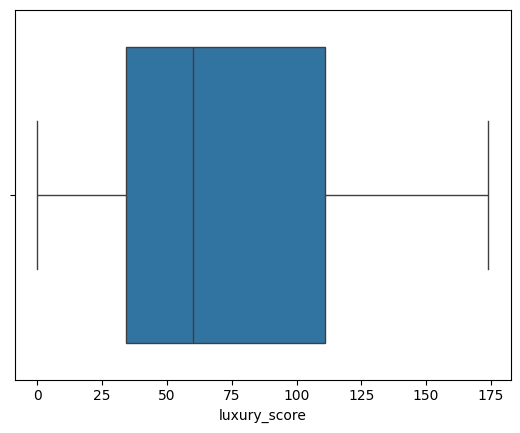

In [10]:
sns.boxplot(x=df['luxury_score'])

In [11]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [12]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [13]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 107,0.50,3,2,2,6.0,Relatively New,717.0,0,0,0,0,1,0,15,Low
1,flat,sector 90,0.47,2,2,1,0.0,New Property,767.0,0,0,0,0,0,0,49,Low
2,flat,sector 83,1.19,3,3,2,10.0,Relatively New,1778.0,0,1,0,0,0,1,35,Low
3,flat,sector 66,1.51,2,2,2,5.0,Relatively New,1188.0,0,0,0,1,0,1,82,Medium
4,flat,sector 62,2.15,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101,Medium


### **floorNum**

<Axes: xlabel='floorNum'>

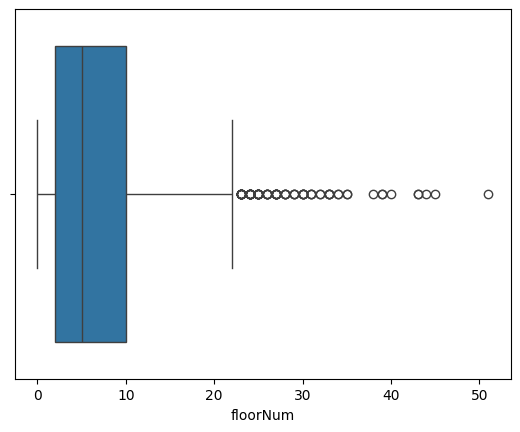

In [14]:
sns.boxplot(x=df['floorNum'])

In [15]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [16]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [17]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [18]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global solera,sector 107,0.50,7752.0,3,2,2,6.0,Relatively New,717.0,0,0,0,0,1,0,15
1,flat,green court,sector 90,0.47,6812.0,2,2,1,0.0,New Property,767.0,0,0,0,0,0,0,49
2,flat,vatika gurgaon,sector 83,1.19,7438.0,3,3,2,10.0,Relatively New,1778.0,0,1,0,0,0,1,35
3,flat,emaar mgf the palm drive,sector 66,1.51,15130.0,2,2,2,5.0,Relatively New,1188.0,0,0,0,1,0,1,82
4,flat,emaar digihomes,sector 62,2.15,14257.0,2,2,3,31.0,Under Construction,1676.0,0,0,0,0,0,0,101


In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37c', 'sector 37d',
       'sector 38', 'sector 39', 'sector 4', 'sector 40', 'sector 41',
       'sector 43', 'sector 45', 'sector 46', 'sector 47', 'sector 48',
       'sector 49', 'sector 5', 'sector 50', 'sector 51', 'sector 52',
       'sector 53', 'sect

In [20]:
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,11.0,3,2,2.0,3.0,717.0,0,0,0,0,1,0,1.0,2.0
1,0.0,104.0,2,2,1.0,1.0,767.0,0,0,0,0,0,0,1.0,1.0
2,0.0,96.0,3,3,2.0,3.0,1778.0,0,1,0,0,0,1,1.0,2.0
3,0.0,75.0,2,2,2.0,3.0,1188.0,0,0,0,1,0,1,2.0,2.0
4,0.0,71.0,2,2,3.0,4.0,1676.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,1.0,80.0,2,2,2.0,2.0,1440.0,0,0,0,0,0,0,1.0,1.0
3550,1.0,113.0,3,3,0.0,0.0,9000.0,0,0,0,0,0,0,1.0,1.0
3551,0.0,12.0,3,3,4.0,3.0,1750.0,0,1,0,1,0,1,0.0,2.0
3552,0.0,93.0,3,3,3.0,0.0,1982.0,0,1,0,1,0,1,1.0,1.0


In [21]:
y_label


0       0.50
1       0.47
2       1.19
3       1.51
4       2.15
        ... 
3549    1.95
3550    6.25
3551    1.55
3552    1.28
3553    0.85
Name: price, Length: 3554, dtype: float64

### **Technique 1 - Correlation Analysis**

<Axes: >

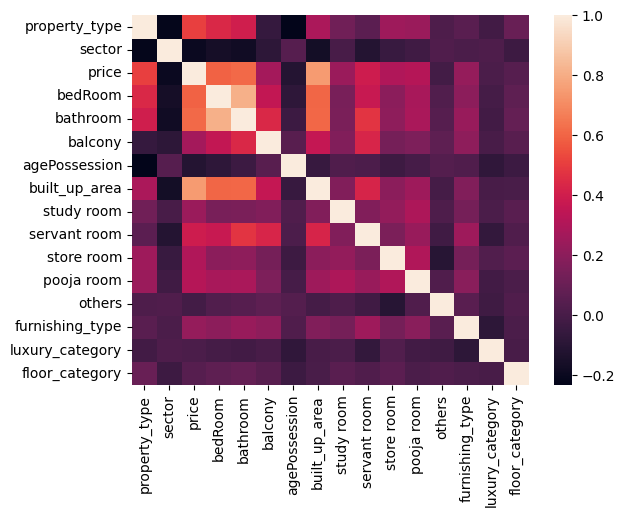

In [22]:
sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.199242
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.113474
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### **Technique 2 - Random Forest Feature Importance**

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.648224
1,sector,0.106504
0,property_type,0.100659
2,bedRoom,0.025960
3,bathroom,0.023592
8,servant room,0.018540
5,agePossession,0.015363
4,balcony,0.012567
12,furnishing_type,0.010425
7,study room,0.008427


### **Technique 3 - Gradient Boosting Feature importances**

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.686913
1,sector,0.101936
0,property_type,0.097733
3,bathroom,0.035050
2,bedRoom,0.032814
8,servant room,0.023796
9,store room,0.007686
5,agePossession,0.004908
7,study room,0.003572
12,furnishing_type,0.002855


### **Technique 4 - Permutation Importance**

In [26]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.702791
0,property_type,0.182688
1,sector,0.121015
8,servant room,0.028112
3,bathroom,0.011667
9,store room,0.008514
7,study room,0.003688
13,luxury_category,0.003649
2,bedRoom,0.003223
5,agePossession,0.002248


### **Technique 5 - LASSO**

In [27]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510230
0,property_type,0.705902
3,bathroom,0.280799
9,store room,0.200201
7,study room,0.172887
12,furnishing_type,0.162061
8,servant room,0.161225
10,pooja room,0.074663
13,luxury_category,0.051237
2,bedRoom,0.011691


### **Technique 6 - RFE**

In [28]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.652417
1,sector,0.103407
0,property_type,0.102513
3,bathroom,0.024310
2,bedRoom,0.022154
8,servant room,0.021391
5,agePossession,0.015105
4,balcony,0.011579
12,furnishing_type,0.010120
9,store room,0.007797


### **Technique 7 - Linear Regression Weights**

In [29]:
from sklearn.linear_model import LinearRegression
# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.512558
0,property_type,0.703488
3,bathroom,0.288379
9,store room,0.204820
7,study room,0.181261
12,furnishing_type,0.171325
8,servant room,0.170212
10,pooja room,0.077932
13,luxury_category,0.061928
2,bedRoom,0.013984


### **Technique 8 - SHAP**

In [30]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-0.18642326, -0.14051891, -0.01241114, ..., -0.01167585,
        -0.00985566, -0.00300645],
       [-0.18066083, -0.33172109, -0.06776244, ..., -0.01094934,
        -0.00570409, -0.00688376],
       [-0.26194893, -0.45566061, -0.01862286, ...,  0.00264779,
        -0.00651151, -0.01270225],
       ...,
       [-0.35857359, -0.22380013, -0.02579421, ...,  0.01320021,
         0.01097909, -0.02664069],
       [-0.33881887, -0.31445261, -0.02871626, ..., -0.0018356 ,
        -0.00884773, -0.02381898],
       [-0.2619578 , -0.28039632, -0.08953295, ..., -0.01146599,
         0.00159945,  0.02991006]], shape=(3554, 15))

In [31]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.245687
0,property_type,0.471244
1,sector,0.386866
3,bathroom,0.111504
8,servant room,0.090241
2,bedRoom,0.056175
4,balcony,0.039656
12,furnishing_type,0.029170
5,agePossession,0.026544
14,floor_category,0.024858


In [32]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [33]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.199242,0.106504,0.101936,0.121015,-0.054096,0.103407,-0.063191,0.386866
bedRoom,0.591289,0.025960,0.032814,0.003223,0.011691,0.022154,0.013984,0.056175
bathroom,0.609777,0.023592,0.035050,0.011667,0.280799,0.024310,0.288379,0.111504
balcony,0.269637,0.012567,0.001633,0.001647,-0.042159,0.011579,-0.064868,0.039656
agePossession,-0.113474,0.015363,0.004908,0.002248,-0.045358,0.015105,-0.053454,0.026544
built_up_area,0.748574,0.648224,0.686913,0.702791,1.510230,0.652417,1.512558,1.245687
study room,0.242955,0.008427,0.003572,0.003688,0.172887,0.007287,0.181261,0.020126
servant room,0.391930,0.018540,0.023796,0.028112,0.161225,0.021391,0.170212,0.090241
store room,0.305677,0.007663,0.007686,0.008514,0.200201,0.007797,0.204820,0.016714


In [34]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [35]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,11.0,3,2,2.0,3.0,717.0,0,0,0,0,1,0,1.0,2.0
1,0.0,104.0,2,2,1.0,1.0,767.0,0,0,0,0,0,0,1.0,1.0
2,0.0,96.0,3,3,2.0,3.0,1778.0,0,1,0,0,0,1,1.0,2.0
3,0.0,75.0,2,2,2.0,3.0,1188.0,0,0,0,1,0,1,2.0,2.0
4,0.0,71.0,2,2,3.0,4.0,1676.0,0,0,0,0,0,0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,1.0,80.0,2,2,2.0,2.0,1440.0,0,0,0,0,0,0,1.0,1.0
3550,1.0,113.0,3,3,0.0,0.0,9000.0,0,0,0,0,0,0,1.0,1.0
3551,0.0,12.0,3,3,4.0,3.0,1750.0,0,1,0,1,0,1,0.0,2.0
3552,0.0,93.0,3,3,3.0,0.0,1982.0,0,1,0,1,0,1,1.0,1.0


In [36]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [37]:
scores.mean()

np.float64(0.8056041789662693)

In [38]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [39]:
scores.mean()

np.float64(0.8053127814730914)

In [40]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [41]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,11.0,3,2,2.0,3.0,717.0,0,0,0,1.0,2.0,0.50
1,0.0,104.0,2,2,1.0,1.0,767.0,0,0,0,1.0,1.0,0.47
2,0.0,96.0,3,3,2.0,3.0,1778.0,1,0,1,1.0,2.0,1.19
3,0.0,75.0,2,2,2.0,3.0,1188.0,0,0,1,2.0,2.0,1.51
4,0.0,71.0,2,2,3.0,4.0,1676.0,0,0,0,2.0,0.0,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,1.0,80.0,2,2,2.0,2.0,1440.0,0,0,0,1.0,1.0,1.95
3550,1.0,113.0,3,3,0.0,0.0,9000.0,0,0,0,1.0,1.0,6.25
3551,0.0,12.0,3,3,4.0,3.0,1750.0,1,0,1,0.0,2.0,1.55
3552,0.0,93.0,3,3,3.0,0.0,1982.0,1,0,1,1.0,1.0,1.28


In [42]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)